# Implementation of the first-visit Monte Carlo algorithm

This algorithm can be used to estimate the value function for the policy $\pi$: $v_\pi$

It is important to note that this algorithm is model-free. This means that it does not need to model the environment before it can make a prediction of the value each state confers.

Here is the pseudo-code that we'll work from:

![img](./imgs/first-visit-monte-carlo.png)

From: Sutton and Barto, 2018. Ch. 5.

In [1]:
# first, import necessary modules
import sys
import gym
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# add your own path to the RL repo here
sys.path.append('/Users/wingillis/dev/reinforcement-learning')

from collections import defaultdict
from lib.envs.gridworld import GridworldEnv
from lib.plotting import plot_gridworld_value_function, plot_value_updates

In [2]:
sns.set_style('white')

In [3]:
# define some hyperparameters
gamma = 0.75  # discounting factor
n_episodes = 5000

In [4]:
# initialize the environment
shape = (5, 5)  # size of the gridworld
env = GridworldEnv(shape, n_goals=2)
env.seed(23)
random.seed(23)

In [5]:
# define a policy function
def policy_fun():
  return random.randint(0, 3)

def generate_episode(env, policy):
  # reset the environment, store the agent's current position (state)
  # create a variable to store the episode (action history)
  while True:
    # return the episode if the agent reached the goal after
    # taking at least one action
    
    # choose an action using the random policy
    
    # take the action in the environment. Remember, the env
    # returns the following values: the next state, the reward magnitude,
    # if the agent has reached the goal, and extra information
    
    # add the results to the variable storing the episode
    
    # update the agent's current position

In [6]:
# each entry in this dictionary is a different state
# where each state is a position in the env
returns = defaultdict(list)

# keep track on how much our value function improves, allows
# us to see when our value function converges
deltas = defaultdict(list)

# create the value function (can just be a numpy array)

for ep in range(n_episodes):
  # generate the episode
  
  # initialize the returns variable
  G = 0
  # work backwards, accumulating rewards
  for i, (init_s, a, r, _) in enumerate(reversed(episode)):
    # update G with the reward
    
    # update V and our deltas variable if this is the first visit
    # to state init_s of the entire episode

## Plot and visualize the value function below

## Try changing the size of the environment. How does the computation time change?

Other questions to think about:

Why does this value function look different from the one you calculated with DP?

What happens when you change gamma?

What are the fewest number of episodes you need to reach a near-optimal value function?

## As a reference, your value functions should match what is seen below for the following hyperparameters:

- gamma: 0.75
- n_episodes: 5000
- shape: (5, 5)

In [7]:
# show the values for each state
V.reshape(shape)

array([[ 0.        , -2.91046965, -3.66882109, -3.86443036, -3.91930819],
       [-2.91595362, -3.51296413, -3.80014086, -3.87398361, -3.87360035],
       [-3.67040543, -3.79872117, -3.8488514 , -3.79110858, -3.6742629 ],
       [-3.8815411 , -3.87526237, -3.78243577, -3.50442914, -2.9087727 ],
       [-3.92842606, -3.88243731, -3.66694819, -2.90576957,  0.        ]])

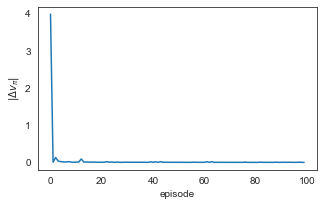

In [8]:
# value change for a single state
fig = plot_value_updates(deltas[12][:100])

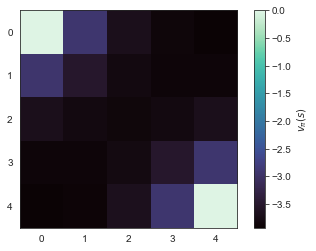

In [9]:
plt.imshow(V.reshape(shape), cmap='mako')
cb = plt.colorbar()
cb.set_label('$v_\pi(s)$')

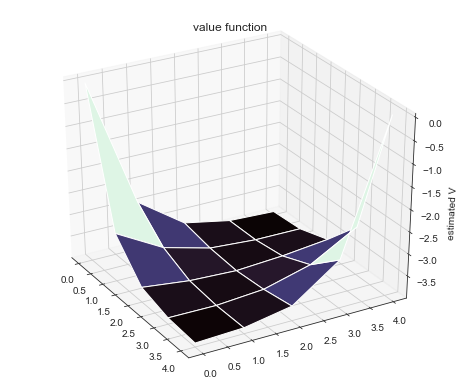

In [10]:
fig = plot_gridworld_value_function(V.reshape(shape))
fig.tight_layout()